# Actividad 2

# Controlador en esquema de Espacio de estados.

El objetivo de este trabajo es realizar un controlador pero en este caso partiendo de la base de un esquema de ESPACIO DE ESTADOS.

## Caso 1 - Motor CC

Partiendo de las ecuaciones de motor y parametros calculados en el trabajo practico anterior

$   LAA=7.14e-04 ;
    J=3.1210e-06; 
    Ra=27; 
    B=0; 
    Ki=16.5 
    Km= 0.0606
$


Modelado por las siguientes Ecuaciones diferenciales:

$\frac{di_a}{dt}=\frac{R_A}{L_{AA}}ia-\frac{K_m}{L_{AA}}\omega _r+\frac{1}{L_{AA}}Va $

$ \frac{d\omega_r}{dt}=\frac{K_i}{J}ia-\frac{B_m}{J}\omega _r+\frac{1}{J}T_L $

$ \frac{d\theta _t}{dt}=\omega _r $


Podiamos modelar un controlador PID obteniendo sus constantes como : Ki=0.01 ;  Kp0.5 ; Kd=1


### Espacio de estados

In [46]:
# Importacion de librerias

import numpy as np
import control as ct
import math
import pandas as pd
import matplotlib.pyplot as plt
from control.matlab import *
import cmath as cm
from math import log
import sympy as sp
from scipy import signal


A partir de las ecuaciones diferenciales modelamos en espacio de estados. Reescribiendo las ecuaciones en matrices y llevando a espacio de estados

In [47]:
# Definir los parámetros del sistema
R_A =27
L_AA =7.14e-4
K_m = 0.0606
J = 3.12e-6
B_m = 0
K_i = 0.0102

## Definir las matrices del sistema de espacio de estados
A = np.array([[-R_A / L_AA, -K_m / L_AA, 0],
              [K_i / J, -B_m / J, 0],
              [0, 1, 0]])

B = np.array([[1 / L_AA],
              [0],
              [0]])

C = np.array([[0, 0, 1]])

D = np.array([[0]])
print('A:', A)
print('B:', B)
print('C:', C)
print('D:', D)

# Crear el sistema de espacio de estados
#sys= ss(A, B, C, D)
sys = signal.StateSpace(A, B, C,D)
tf = sys.to_tf()
print("Función de transferencia:")
print(tf)
#sys_tf=ct.ss2tf(sys)
#print('sys_tf:', sys_tf)

# Función de transferencia



A: [[-3.78151261e+04 -8.48739496e+01  0.00000000e+00]
 [ 3.26923077e+03  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]]
B: [[1400.56022409]
 [   0.        ]
 [   0.        ]]
C: [[0 0 1]]
D: [[0]]
Función de transferencia:
TransferFunctionContinuous(
array([ 2.18278728e-11, -2.77708750e-07,  4.57875458e+06]),
array([1.00000000e+00, 3.78151261e+04, 2.77472527e+05, 0.00000000e+00]),
dt: None
)


/home/mateo_d/.local/lib/python3.10/site-packages/scipy/signal/_ltisys.py:600: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


## Obvservabilidad

Determino si el sistema es observable. Debo construir la matriz de obvservabilidad. La cual es la siguiente:

$\begin{bmatrix}
C\\
CA 
\\
CA^{n-1} 
\end{bmatrix}$

Calculo su rango , si el rango de es igual al numero de estados de el sisema , entonces el sistema es obvservable

In [48]:
n = A.shape[0] #numero de estados
O = np.vstack([C @ np.linalg.matrix_power(A, i) for i in range(n)])
print('Matriz de observabilidad:\n', O)
range_O = np.linalg.matrix_rank(O)
print('Rango de la matriz de observabilidad:', range_O)
# Verificar observabilidad
if range_O == n:
    print("El sistema es completamente observable.")
else:
    print("El sistema no es completamente observable.")


Matriz de observabilidad:
 [[0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.26923077e+03 0.00000000e+00 0.00000000e+00]]
Rango de la matriz de observabilidad: 3
El sistema es completamente observable.


## Controlabilidad
Determino si el sistema es observable. Debo construir la matriz de obvservabilidad. La cual es la siguiente:

$\begin{bmatrix}
A &AB  &A^{n-1}B 
\end{bmatrix}$

Calculo su rango , si el rango de es igual al numero de estados de el sisema , entonces el sistema es controlable


In [49]:
# Calcular la matriz de controlabilidad
n = A.shape[0]  # Número de estados
C_ctrl = np.hstack([np.linalg.matrix_power(A, i) @ B for i in range(n)])

print('Matriz de controlabilidad:\n', C_ctrl)
range_C_ctrl = np.linalg.matrix_rank(C_ctrl)
print('Rango de la matriz de controlabilidad:', range_C_ctrl)

# Verificar controlabilidad
if range_C_ctrl == n:
    print("El sistema es completamente controlable.")
else:
    print("El sistema no es completamente controlable.")


Matriz de controlabilidad:
 [[ 1.40056022e+03 -5.29623614e+07  2.00238976e+12]
 [ 0.00000000e+00  4.57875458e+06 -1.73146182e+11]
 [ 0.00000000e+00  0.00000000e+00  4.57875458e+06]]
Rango de la matriz de controlabilidad: 3
El sistema es completamente controlable.


## Asignacion de polos

Habiendo obtenido la funcion de transferencia del sistema

$G(s) = \frac{s^2 - 2.77708750 \times 10^{-7}s + 4.57875458 \times 10^6}{1.00000000s^3 + 3.78151261 \times 10^4s^2 + 2.77472527 \times 10^5s + 2.18278728 \times 10^{-11}}$

Coincide el orden del numerador con la cantidad de estados

In [50]:
# Calcular los polos del sistema abierto
poles_LA= np.linalg.eigvals(A)
print("Polos del sistema abierto:", poles_LA)  
## Polos del sistema abierto -> (0,-7.339,-3.78e+4)


#Forma canonica controlable

#Aplico Ackermann

# Convertir el sistema a su forma controlable
T = ct.ctrb(A, B)
T_inv = np.linalg.inv(T)
Ac = T_inv @ A @ T
Bc = T_inv @ B

# Especificar los polos deseados
polos_deseados = [-1.5, -2, -20000]

# Calcular las ganancias del controlador utilizando el método de Ackermann
K = ct.acker(Ac, Bc, polos_deseados)

print("Ganancias del controlador (Ackermann):")
print(K)



Polos del sistema abierto: [ 0.00000000e+00 -7.33903117e+00 -3.78077870e+04]
Ganancias del controlador (Ackermann):
[[-1.78116261e+04  6.73341415e+08 -2.54575482e+13]]


In [51]:
K= np.array([[-1.78116261e+04, 6.73341415e+08,-2.54575482e+13]])
# Definir el sistema de lazo cerrado
Ac = A - B @ K
Bc = B
Cc = C
Dc = D


## Terminar simulacion

## Tiempo de simulacion e integración

In [80]:
# Definir el tiempo de simulación y tiempo de integración
#Tiempo de integracion de euler -> obtener polos lazo abierto

poles= np.linalg.eigvals(A)
print('Polos:', poles)

#El polo mayor es 0 pero no es parte de la dinamica de el sistema(indica no estabilidad)
dominant_complex_pole = poles[1]  # Se elige uno de los polos complejos conjugados

#Tiempo intrgracion de euler
tR = np.log(0.95) / np.abs(dominant_complex_pole.real)
print('Tiempo de integración de Euler:', tR)

#Tiempo de simulacion

Polos: [ 0.00000000e+00 -7.33903117e+00 -3.78077870e+04]
Tiempo de integración de Euler: -0.006989109759380351


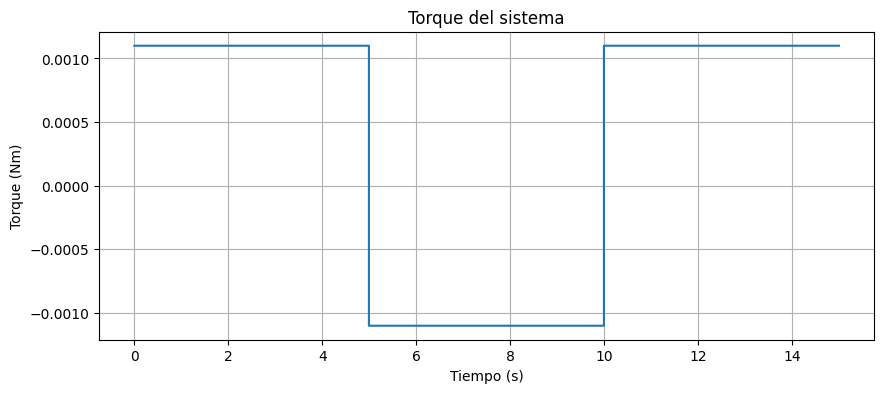

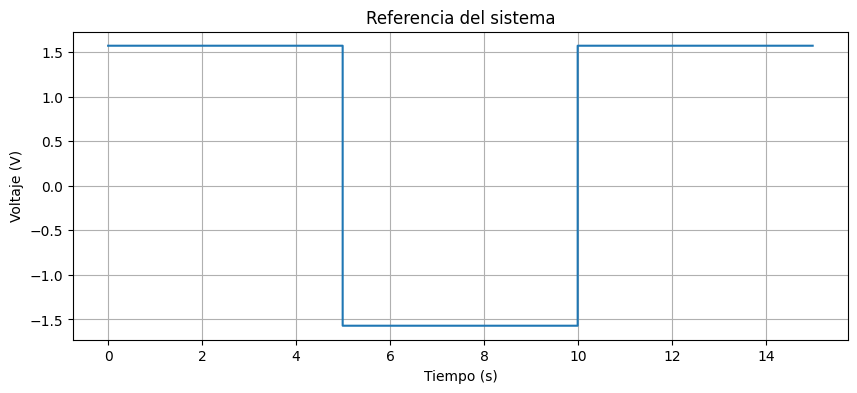

In [85]:
# Definir el tiempo de integración y simulación
h = 0.01  # Intervalo de tiempo de integración
simTime = 15
  # Tiempo total de simulación
t = np.arange(0, simTime, h)

# Frequency of the signal
frequency = 0.1  # Frequency of the signal in Hz (every 10 seconds)

# Generate square signal with sign change every 5 seconds
reference = np.pi/2 * signal.square(2 * np.pi * frequency * t, duty=0.5)

# Definir el torque de entrada
torque_reference = 1.1e-3 * signal.square(2 * np.pi * frequency * t, duty=0.5)

#visualizacion torque
plt.figure(figsize=(10, 4))
plt.plot(t, torque_reference, drawstyle='steps-pre')
plt.title('Torque del sistema')
plt.xlabel('Tiempo (s)')
plt.ylabel('Torque (Nm)')
plt.grid(True)
plt.show()

# Visualize the input signal
plt.figure(figsize=(10, 4))
plt.plot(t, reference, drawstyle='steps-pre')
plt.title('Referencia del sistema')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.grid(True)
plt.show()